In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
df1 = pd.read_csv('/content/twitter_training.csv', names=col_names)
df2 = pd.read_csv('/content/twitter_validation.csv', names=col_names)
df1
df2

,ID,Entity,Sentiment,Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df1.isnull().sum()
df1['Sentiment'] = df1['Sentiment'].replace('Irrelevant', 'Neutral')
df1['Sentiment'] = df1['Sentiment'].replace('Irrelevant', 'Neutral')

In [ ]:
sentiment_counts = df1['Sentiment'].value_counts().sort_index()

sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_colors = ['red', 'grey', 'green']

fig = go.Figure(data=[go.Pie(labels=sentiment_counts.index,
                             values=sentiment_counts.values,
                             textinfo='percent+value+label',
                             marker_colors=sentiment_colors,
                             textposition='auto',
                             hole=.3)])

fig.update_layout(
    title_text='Sentiment Distribution',
    template='plotly_white',
    xaxis=dict(
        title='Sources',
    ),
    yaxis=dict(
        title='Number of Posts in Twitter',
    )
)

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)

fig.show()

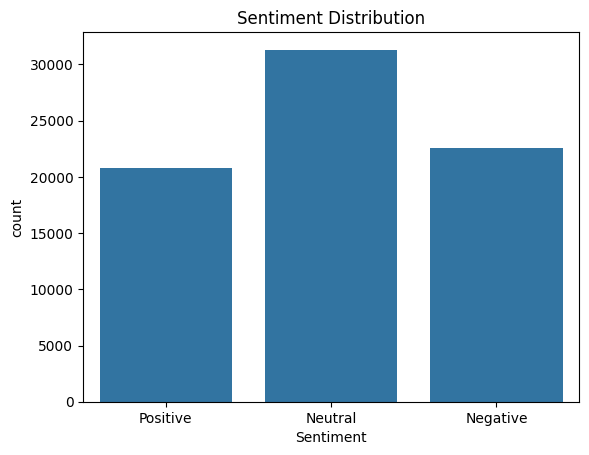

In [ ]:
# Sentiment distribution
sns.countplot(x='Sentiment', data=df1)
plt.title('Sentiment Distribution')
plt.show()

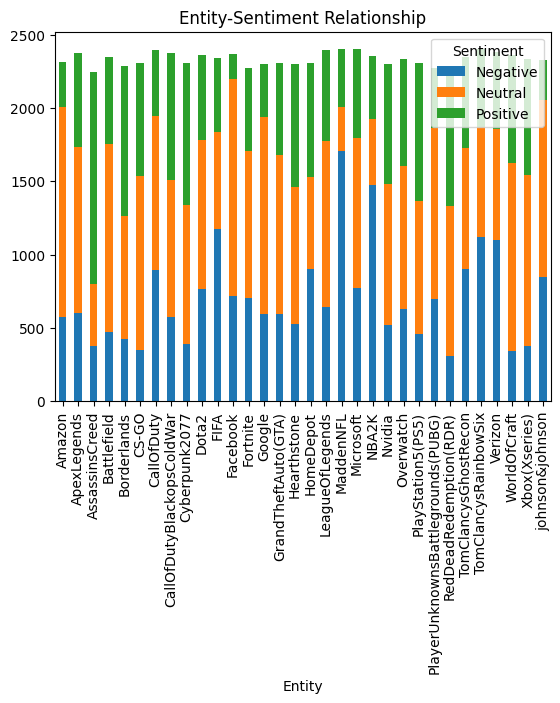

In [ ]:
# Entity and sentiment relationship
entity_sentiment_counts = df1.groupby(['Entity', 'Sentiment']).size().unstack()
entity_sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Entity-Sentiment Relationship')
plt.show()

In [ ]:
#top 10 entity

top10_entity_counts = df1['Entity'].value_counts().sort_values(ascending=False)[:10]

fig = px.bar(x=top10_entity_counts.index,
             y=top10_entity_counts.values,
             color=top10_entity_counts.values,
             text=top10_entity_counts.values,
             color_continuous_scale='Blues')

fig.update_layout(
    title_text='Top 10 Twitter Entity Distribution',
    template='plotly_white',
    xaxis=dict(
        title='Entity',
    ),
    yaxis=dict(
        title='Number of Posts in Twitter',
    )
)

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)

fig.show()

In [ ]:
#sentiment distribution in top3 entity
top3_entity_df = df1['Entity'].value_counts().sort_values(ascending=False)[:3]
top3_entity = top3_entity_df.index.tolist()
sentiment_by_entity = df1.loc[df1['Entity'].isin(top3_entity)].groupby('Entity')['Sentiment'].value_counts().sort_index()

sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_colors = ['red', 'grey', 'green']

row_n = 1
col_n = 3

fig = make_subplots(rows=row_n, cols=col_n,
                    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=top3_entity)

for i, col in enumerate(top3_entity):
    fig.add_trace(
        go.Pie(labels=sentiment_labels,
                values=sentiment_by_entity[col].values,
                textinfo='percent+value+label',
                marker_colors=sentiment_colors,
                textposition='auto',
                name=col),
            row=int(i/col_n)+1, col=int(i%col_n)+1)

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)

fig.show()

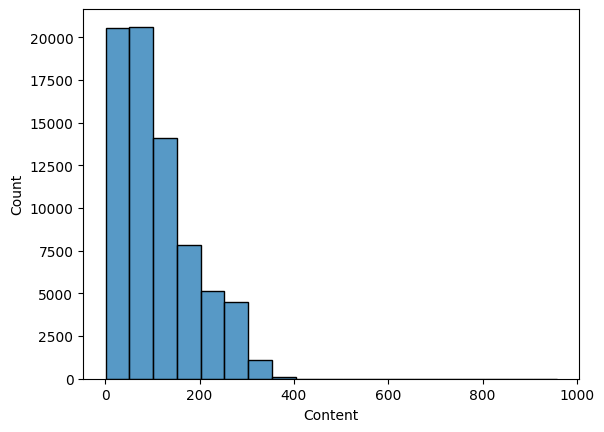

In [ ]:
sns.histplot(df1["Content"].str.len(), binwidth=50)
plt.show()

In [ ]:
#Count entity per category
plot1=df1.groupby(by=["Entity","Sentiment"]).count().reset_index()
plot1.head()

,Entity,Sentiment,ID,Content
0,Amazon,Negative,576,575
1,Amazon,Neutral,1428,1393
2,Amazon,Positive,312,308
3,ApexLegends,Negative,600,591
4,ApexLegends,Neutral,1134,1128


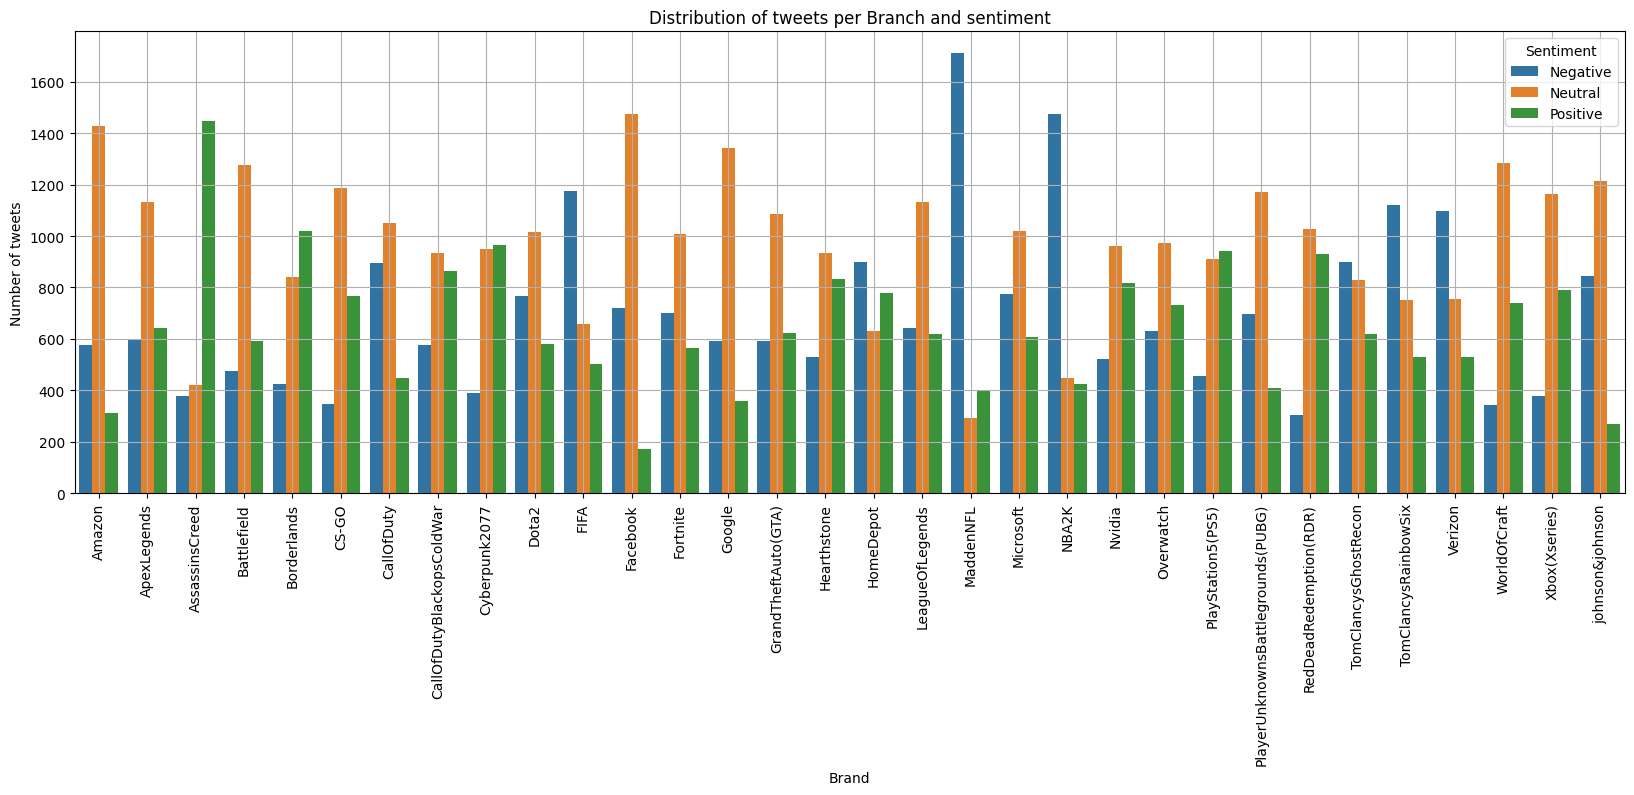

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="Entity",y="ID",hue="Sentiment")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and sentiment");